<AxesSubplot:ylabel='Count'>

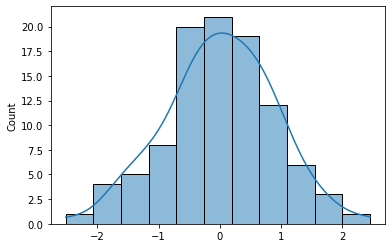

In [1]:
import seaborn as sns
import numpy as np 


x = np.random.randn(100)
sns.histplot(x, kde=True)

c:\Users\jason\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

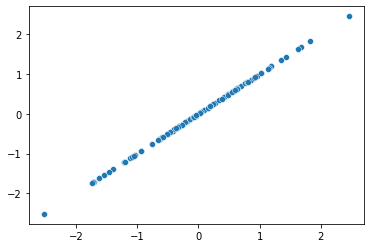

In [2]:
def scatt():
    sns.scatterplot(x, x)

In [ ]:
import unittest
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class TestSeaborn(unittest.TestCase):
    def test_scatterplot(self):
        # Create test data
        x = np.random.randn(100)
        y = np.random.randn(100)
        
        # Call the scatterplot function
        sns.scatterplot(x, y)
        
        # Check if the plot was created successfully
        self.assertIsNotNone(plt.gca().get_lines())

if __name__ == '__main__':
    unittest.main()

In [1]:
from sklearn.model_selection import train_test_split
X, y = [],[]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import r2_score

lr = LinearRegression().fit(train_X, train_y)
y_hat = lr.predict(test_X)
print(f"Score: {r2_score(test_y, y_hat)}")

In [ ]:
from sklearn.model_selection import cross_val_predict
import numpy as np 
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import cross_val_predict
import numpy as np 
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

alphas = np.geomspace(1e-9, 1e0, num=10)
s = StandardScaler()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
coefs = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    X = s.fit_transform(X)
    predictions = cross_val_predict(las, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = r2_score(y_test.values, y_pred)
    scores.append(score)
    
scores

In [ ]:
for parm in params:
    model = Model(para=para)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                            X.iloc[test_index, :], 
                                            y[train_index], 
                                            y[test_index])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test.values, y_pred)
        scores.append(score)
scores

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y) 
grid.best_score_, grid.best_params_
y_predict = grid.predict(X)
r2_score(y_predict,y)